# Notebook for tracing curve for PIMRC Paper
## Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys, time
import numpy as np
import warnings

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
     return ((np.fabs(y_true - y_pred)/y_true).mean())

## Data comparison between calculated data, transmitted data and real data
Working with Float-16 encoded values

In [3]:
dataframe = read_csv('Data_curves/prod_nuc_1h.csv', engine='python')
dataframe

,Index,CalculatedData,ActualData,RetainedData,Transmitted
0,0,232,164,164,True
1,1,208,182,208,False
2,2,238,155,155,True
3,3,200,165,200,False
4,4,229,145,145,True
...,...,...,...,...,...
713,713,312,232,232,True
714,714,278,287,278,False
715,715,308,268,308,False
716,716,337,316,337,False


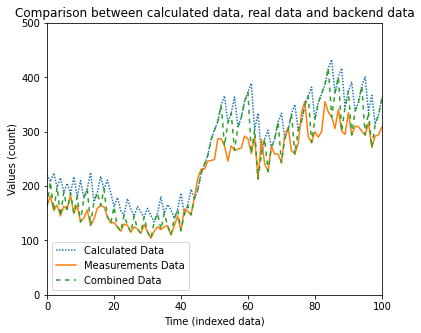

In [33]:
fig, ax = plt.subplots(figsize = (6,5))

ax.set_title('Comparison between calculated data, real data and backend data') 
  
# label x-axis and y-axis 
ax.set_xlabel('Time (indexed data)') 
ax.set_ylabel('Values (count)') 

plt.plot(dataframe["CalculatedData"], label = "Calculated Data", dashes=[1, 1])
plt.plot(dataframe["ActualData"], label = "Measurements Data")
plt.plot(dataframe["RetainedData"], label = "Combined Data" , dashes=[3, 3])
#plt.plot(dataframe["Index"],dataframe["ActualData"])
#plt.plot(dataframe["Index"],dataframe["RetainedData"])

ax.legend(loc='lower left')

ax.set_xlim(0, 100) 
ax.set_ylim(0, 500)

plt.show()

## Data comparison between calculated data, transmitted data and real data
Working with 8-bit quantified values

In [5]:
dataframe = read_csv('Data_curves/prod_nuc_1hq.csv', engine='python')
dataframe

,Index,CalculatedData,ActualData,RetainedData,Transmitted
0,0,221,164,164,True
1,1,208,182,208,False
2,2,224,155,155,True
3,3,198,165,198,False
4,4,215,145,145,True
...,...,...,...,...,...
713,713,302,232,232,True
714,714,275,287,275,False
715,715,305,268,305,False
716,716,322,316,322,False


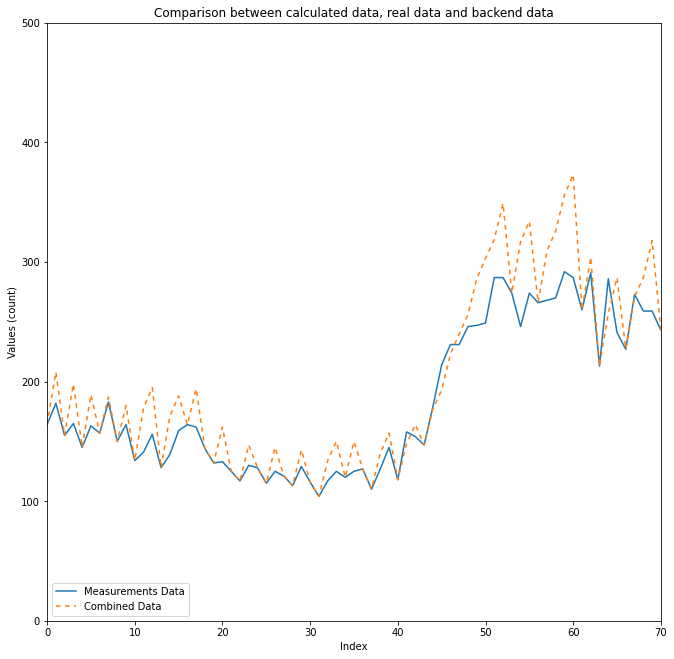

In [6]:
fig, ax = plt.subplots(figsize = (11,11))

ax.set_title('Comparison between calculated data, real data and backend data') 
  
# label x-axis and y-axis 
ax.set_xlabel('Index') 
ax.set_ylabel('Values (count)') 

#plt.plot(dataframe["CalculatedData"], label = "Calculated Data", dashes=[1, 1])
plt.plot(dataframe["ActualData"], label = "Measurements Data")
plt.plot(dataframe["RetainedData"], label = "Combined Data" , dashes=[3, 3])
#plt.plot(dataframe["Index"],dataframe["ActualData"])
#plt.plot(dataframe["Index"],dataframe["RetainedData"])

ax.legend(loc='lower left')

ax.set_xlim(0, 70) 
ax.set_ylim(0, 500)

plt.show()

## Comparison between 32-bits simulation, 16-bits experiment and 8-bit quantified experiment

In [7]:
dataframe_32 = read_csv('Data_curves/prod_nuc_1h_32.csv', usecols=[1,2,3], engine='python')
dataframe_16 = read_csv('Data_curves/prod_nuc_1h.csv', usecols=[1,2,3,4], engine='python')
dataframe_8 = read_csv('Data_curves/prod_nuc_1hq.csv', usecols=[1,2,3,4], engine='python')

In [8]:
dataframe_32['RetainedData'] = np.where(dataframe_32["Transmitted"], dataframe_32["ActualData"], dataframe_32["CalculatedData"])

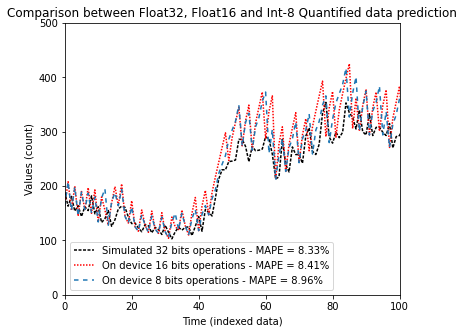

In [36]:
fig, ax = plt.subplots(figsize = (6,5))

ax.set_title('Comparison between Float32, Float16 and Int-8 Quantified data prediction') 
  
# label x-axis and y-axis 
ax.set_xlabel('Time (indexed data)') 
ax.set_ylabel('Values (count)') 

plt.plot(dataframe_32["RetainedData"], label = "Simulated 32 bits operations - MAPE = 8.33%", dashes=[2, 1], color ='black')
plt.plot(dataframe_16["RetainedData"], label = "On device 16 bits operations - MAPE = 8.41%" , dashes=[1, 1], color ='red')
plt.plot(dataframe_8["RetainedData"], label = "On device 8 bits operations - MAPE = 8.96%" , dashes=[3, 3])

#plt.plot(dataframe["Index"],dataframe["ActualData"])
#plt.plot(dataframe["Index"],dataframe["RetainedData"])

ax.legend(loc='lower left')
ax.set_xlim(0, 100) 
ax.set_ylim(0, 500) 

plt.show()


## Comparison between 32-bits simulation, 16-bits experiment and 8-bit quantified experiment (RMSE Calculations)

In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
     return ((np.fabs(y_true - y_pred)/y_true).mean())

### MAPE Transmission Sim - Measurements - 30% Threshold - 70% compression - 11.7% MAPE LSTM

In [11]:
mape = mean_absolute_percentage_error(dataframe_32["RetainedData"][0:100],dataframe_32["ActualData"][0:100])*100
print("Mean Absolute Percentage Error in the float32 case : ", round(mape,2), "%")

Mean Absolute Percentage Error in the float32 case :  9.03 %


### MAPE Transmission 16-bit exp - Measurements - 30% Threshold - 70% compression - 11.7% MAPE LSTM

In [12]:
mape = mean_absolute_percentage_error(dataframe_16["RetainedData"],dataframe_16["ActualData"])*100
print("Mean Absolute Percentage Error in the float16 case : ", round(mape,2), "%")

Mean Absolute Percentage Error in the float16 case :  8.41 %


### MAPE Transmission 8-bit quant exp - Measurements - 30% Threshold - 70% compression - 11.7% MAPE LSTM

In [13]:
mape = mean_absolute_percentage_error(dataframe_8["RetainedData"],dataframe_8["ActualData"])*100
print("Mean Absolute Percentage Error in the int8 quantified case : ", round(mape,2), "%")

Mean Absolute Percentage Error in the int8 quantified case :  8.96 %


## Simulations of dual prediction performances with regards to different threshold (count)

In [14]:
resultats = read_csv('Data_curves/results_dual_predictions.txt', usecols=[0,1,2], engine='python', sep =";")

In [15]:
set_resultat = resultats.values

In [16]:
set_resultat = set_resultat.astype('float32')
where_are_NaNs = np.isnan(set_resultat)
set_resultat[where_are_NaNs] = 0

In [17]:
newdataset1 = []
newdataset2 = []
newdataset3 = []

for i in range(len(set_resultat)):
    a = set_resultat[i,0]
    b = set_resultat[i,1]
    c = set_resultat[i,2]
    if b<70 :
        newdataset1.append(a)
        newdataset2.append(b)
        newdataset3.append(c)

### Plotting 3D curve

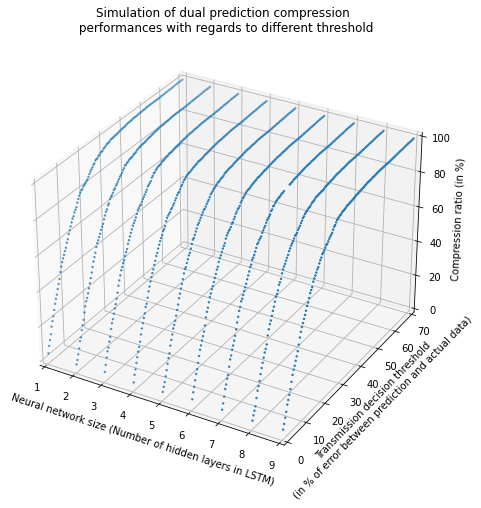

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax.plot(newdataset1, newdataset2, newdataset3) 
ax.set_title('Simulation of dual prediction compression \n performances with regards to different threshold') 
  
# label x-axis and y-axis 
ax.set_xlabel('Neural network size (Number of hidden layers in LSTM)') 
ax.set_ylabel('Transmission decision threshold \n(in % of error between prediction and actual data)') 
ax.set_zlabel('Compression ratio (in %)') 

# set x, y-axis limits  
ax.set_xlim(1, 9) 
ax.set_ylim(0, 70) 
ax.set_zlim(0, 100) 


ax.scatter(newdataset1, newdataset2, newdataset3, s=2)


#plt.plot(newdataset2[1791:1990], newdataset3[1791:1990], c='green')

#plt.plot(newdataset2, newdataset3) 
plt.show()


### Plotting 2D curve

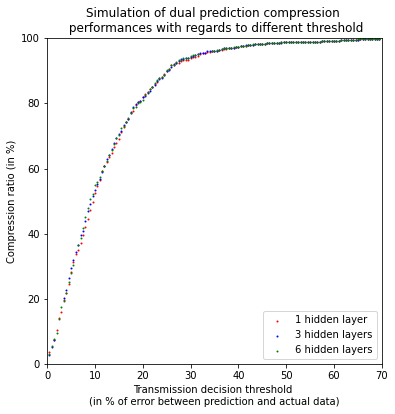

In [19]:
fig, ax = plt.subplots(figsize = (6,6))
#ax = fig.add_subplot(111, projection='3d')

ax.set_title('Simulation of dual prediction compression \n performances with regards to different threshold') 
  
# label x-axis and y-axis 
ax.set_xlabel('Transmission decision threshold \n(in % of error between prediction and actual data)') 
ax.set_ylabel('Compression ratio (in %)') 

# set x, y-axis limits  
ax.set_xlim(0, 70) 
ax.set_ylim(0, 100) 
for i,col in [(1,'red'),(3, 'blue'),(6, 'green')]:
    if i == 1 : 
        label = "1 hidden layer"
    else:
        label = (str) (i) + " hidden layers"    
    plt.scatter(newdataset2[(i*141): ((i+1)*140)-1], newdataset3[(i*141): ((i+1)*140)-1], s=1, c=col, label = label)
    ax.legend(loc='lower right')

#plt.plot(newdataset2[1791:1990], newdataset3[1791:1990], c='green')

plt.show()

## Simulations of dual prediction performances with regards to different threshold (RMSE)

In [20]:
#resultats = read_csv('Data_curves/results_dual_predictions_complete.txt', usecols=[0,1,2], engine='python', sep =";")

### Calcul RMSE

In [21]:
set_resultat = resultats.values

In [22]:
set_resultat = set_resultat.astype('float32')
where_are_NaNs = np.isnan(set_resultat)
set_resultat[where_are_NaNs] = 0

In [23]:
newdataset1 = []
newdataset2 = []
newdataset3 = []

for i in range(len(set_resultat)):
    a = set_resultat[i,0]
    b = set_resultat[i,1]
    c = set_resultat[i,2]
    if b<70 :
        newdataset1.append(a)
        newdataset2.append(b)
        newdataset3.append(c)

### Plotting the curve

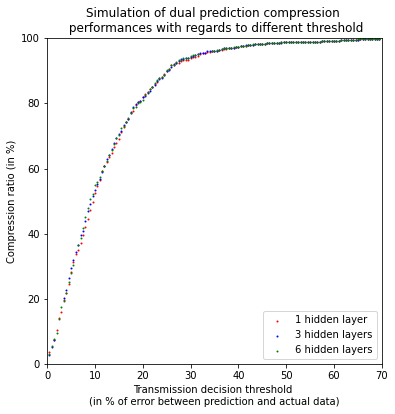

In [24]:
fig, ax = plt.subplots(figsize = (6,6))
#ax = fig.add_subplot(111, projection='3d')

ax.set_title('Simulation of dual prediction compression \n performances with regards to different threshold') 
  
# label x-axis and y-axis 
ax.set_xlabel('Transmission decision threshold \n(in % of error between prediction and actual data)') 
ax.set_ylabel('Compression ratio (in %)') 

# set x, y-axis limits  
ax.set_xlim(0, 70) 
ax.set_ylim(0, 100) 
for i,col in [(1,'red'),(3, 'blue'),(6, 'green')]:
    if i == 1 : 
        label = "1 hidden layer"
    else:
        label = (str) (i) + " hidden layers"    
    plt.scatter(newdataset2[(i*141): ((i+1)*140)-1], newdataset3[(i*141): ((i+1)*140)-1], s=1, c=col, label = label)
    ax.legend(loc='lower right')

#plt.plot(newdataset2[1791:1990], newdataset3[1791:1990], c='green')

plt.show()

##

## Energy consumption data

### With Machine Learning

In [14]:
calculation_dataframe = read_csv('Data_curves/calculation_ML_1h/working_on_data.csv', engine='python')
calculation_dataframe

,Time,Intensity
0,10.0,0.00
1,20.0,36.49
2,30.0,959.30
3,40.0,913.00
4,50.0,964.50
...,...,...
653876,6538770.0,120.00
653877,6538780.0,147.00
653878,6538790.0,123.30
653879,6538800.0,149.20


In [15]:
transmission_dataframe = read_csv('Data_curves/transmission_ML_1h/working_on_data.csv', engine='python')
transmission_dataframe

,Time,Intensity
0,9630.0,23.70
1,9640.0,19.99
2,9650.0,16.70
3,9660.0,18.88
4,9670.0,19.99
...,...,...
653876,6548390.0,22.52
653877,6548400.0,18.64
653878,6548410.0,21.07
653879,6548420.0,19.98


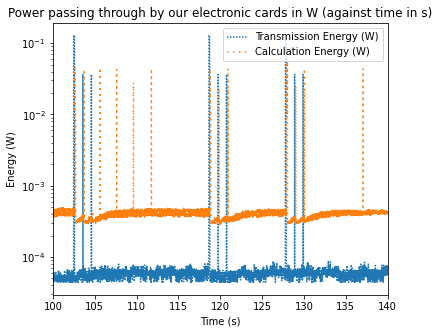

In [38]:
fig, ax = plt.subplots(figsize = (6,5))

ax.set_title('Power passing through by our electronic cards in W (against time in s)') 
  
# label x-axis and y-axis 
ax.set_xlabel('Time (s)') 
ax.set_ylabel('Energy (W)') 

plt.plot((transmission_dataframe["Time"])/1000,transmission_dataframe["Intensity"]*3.3*0.000001, label = "Transmission Energy (W)", dashes=[1, 1])
plt.plot((calculation_dataframe["Time"]+9400)/1000, calculation_dataframe["Intensity"]*3.3*0.000001, label = "Calculation Energy (W)", dashes=[1, 3])
ax.legend(loc='upper right')

ax.set_xlim(100, 140) 
plt.yscale('log')

plt.show()

### Extracting the spikes

In [28]:
#dataframe[dataframe["Intensity"] < 400]
#dataframe[dataframe["Intensity"] < 400]['Intensity'].mean()
#dataframe[dataframe["Intensity"] < 400]['Intensity'].var()

In [29]:
toto = transmission_dataframe[transmission_dataframe["Intensity"] > 20000]
toto
transmission_dataframe[transmission_dataframe["Intensity"] > 500]["Intensity"].mean()
print(transmission_dataframe_no_ML['Intensity'].mean())

NameError: name 'transmission_dataframe_no_ML' is not defined

In [ ]:
a=0
count=0
for i in toto["Time"]:
    if (i-a==10) :
        a = i
    else:
        a = i
        count+=1
print("Amount of transmissions :", count)

### Above value is the number of transmissions

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area per transmission (J) = ",  (area*3.3*0.000001)/count * 0.001)
print("Power in W = ", (area*3.3*0.000001) / count)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(dataframe[dataframe["Intensity"] < 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(transmission_dataframe[transmission_dataframe["Intensity"] < 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area between each transmissions (J) = ",  (area*3.3*0.000001)/count * 0.001)

Calculations

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(calculation_dataframe[calculation_dataframe["Intensity"] > 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area per transmission (J) = ",  (area*3.3*0.000001)/count * 0.001)
print("Power in W = ", (area*3.3*0.000001) / count)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(dataframe[dataframe["Intensity"] < 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(calculation_dataframe[calculation_dataframe["Intensity"] < 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area between each transmissions (J) = ",  (area*3.3*0.000001)/count * 0.001)
1032360357
810971211

### Without Machine Learning

In [ ]:
calculation_dataframe_no_ML = read_csv('Data_curves/calculation_no_ML/working_on_data.csv', engine='python')
calculation_dataframe_no_ML

In [ ]:
transmission_dataframe_no_ML = read_csv('Data_curves/transmission_no_ML/working_on_data.csv', engine='python')
transmission_dataframe_no_ML

In [ ]:
fig, ax = plt.subplots(figsize = (11,11))

ax.set_title('Data consumption') 
  
# label x-axis and y-axis 
ax.set_xlabel('Time') 
ax.set_ylabel('Current') 

plt.plot(transmission_dataframe_no_ML["Intensity"], label = "Transmission Energy (W) against time", dashes=[1, 1])
plt.plot(calculation_dataframe_no_ML["Intensity"], label = "Calculation Energy (W) against time", dashes=[1, 1])
ax.legend(loc='lower left')

ax.set_xlim(0, 10000) 
ax.set_ylim(0, 50000)

plt.show()

In [ ]:
toto = transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] > 20000]
toto
#transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'].mean()
#transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'].var()

In [ ]:
a=0
count=0
for i in toto["Time"]:
    if (i-a==10) :
        a = i
    else:
        a = i
        count+=1
    if (count == 718):
        print(a)
print("Amount of transmissions :", count)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] > 400]['Intensity'], dx=10)
print("area = ", area*3.3*0.000001)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area per transmission (J) = ",  (area*3.3*0.000001)/count * 0.001)
print("Power in W = ", (area*3.3*0.000001) / count)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(dataframe[dataframe["Intensity"] < 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] < 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area between each transmissions (J) = ",  (area*3.3*0.000001)/count * 0.001)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(transmission_dataframe[transmission_dataframe["Intensity"] > 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] > 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area per transmission (J) = ",  (area*3.3*0.000001)/count * 0.001)
print("Power in W = ", (area*3.3*0.000001) / count)

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# Compute the area using the composite trapezoidal rule.
#area = trapz(dataframe[dataframe["Intensity"] < 400]['Intensity'], dx=10)
#print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] < 400]['Intensity'], dx=10)
print("area = ", area)

# Area * 3.3V * 10^-6 (µA) * 0.001 (ms)
print("area between each transmissions (J) = ",  (area*3.3*0.000001)/count * 0.001)

### Results

In [ ]:
print("Mean spikes in W, calculations : " , calculation_dataframe[calculation_dataframe["Intensity"] > 500]["Intensity"].mean()*3.3*0.000001, "Count : ", calculation_dataframe[calculation_dataframe["Intensity"] > 500]["Intensity"].count())
print("Var spikes, calculations : ", (calculation_dataframe[calculation_dataframe["Intensity"] > 500]["Intensity"]*3.3*0.000001).var())
print("Mean flat in W, calculations :", calculation_dataframe[calculation_dataframe["Intensity"] < 500]["Intensity"].mean()*3.3*0.000001,  "Count : ",calculation_dataframe[calculation_dataframe["Intensity"] < 500]["Intensity"].count())
print("Var flat, calculations : ", (calculation_dataframe[calculation_dataframe["Intensity"] < 500]["Intensity"]*3.3*0.000001).var())

In [ ]:
print("Mean spikes in W, transmission : ", transmission_dataframe[transmission_dataframe["Intensity"] > 500]["Intensity"].mean()*3.3*0.000001, "Count : ", transmission_dataframe[transmission_dataframe["Intensity"] > 500]["Intensity"].count())
print("Var spikes, transmission : ", (transmission_dataframe[transmission_dataframe["Intensity"] > 500]["Intensity"]*3.3*0.000001).var())
print("Mean flat in W, transmission :", transmission_dataframe[transmission_dataframe["Intensity"] < 500]["Intensity"].mean()*3.3*0.000001, "Count : ", transmission_dataframe[transmission_dataframe["Intensity"] < 500]["Intensity"].count())
print("Var flat, transmission : ", (transmission_dataframe[transmission_dataframe["Intensity"] < 500]["Intensity"]*3.3*0.000001).var())

In [ ]:
print("Mean spikes in W, calculations_no_ML : ", calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] > 500]["Intensity"].mean()*3.3*0.000001, "Count : ",calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] > 500]["Intensity"].count())
print("Var spikes, calculations_no_ML : ", (calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] > 500]["Intensity"]*3.3*0.000001).var())
print("Mean flat in W, calculations_no_ML : ", calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] < 500]["Intensity"].mean()*3.3*0.000001, "Count : ",calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] < 500]["Intensity"].count())
print("Var flat, calculations_no_ML : ", (calculation_dataframe_no_ML[calculation_dataframe_no_ML["Intensity"] < 500]["Intensity"]*3.3*0.000001).var())

In [ ]:
print("Mean spikes in W, transmission_no_ML : ", transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] > 500]["Intensity"].mean()*3.3*0.000001, "Count : ", transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] > 500]["Intensity"].count())
print("Var spikes, transmission_no_ML : ", (transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] > 500]["Intensity"]*3.3*0.000001).var())
print("Mean flat in W, transmission_no_ML : ", transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] < 500]["Intensity"].mean()*3.3*0.000001, "Count : ", transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] < 500]["Intensity"].count())
print("Var flat, transmission_no_ML : ", (transmission_dataframe_no_ML[transmission_dataframe_no_ML["Intensity"] < 500]["Intensity"]*3.3*0.000001).var())

In [ ]:
print("Mean calculations in W : ", calculation_dataframe["Intensity"].mean()*3.3*0.000001, "Count : ", calculation_dataframe["Intensity"].count())
print("Var calculations : ", (calculation_dataframe["Intensity"]*3.3*0.000001).var())
print("Mean calculations_no_ML in W : ", calculation_dataframe_no_ML["Intensity"].mean()*3.3*0.000001, "Count : ", calculation_dataframe_no_ML["Intensity"].count())
print("Var calculations_no_ML : ", (calculation_dataframe_no_ML["Intensity"]*3.3*0.000001).var())

In [ ]:
print("Mean transmission in W : ", transmission_dataframe["Intensity"].mean()*3.3*0.000001, "Count : ",transmission_dataframe["Intensity"].count())
print("Var transmission : ", (transmission_dataframe["Intensity"]*3.3*0.000001).var())
print("Mean transmission_no_ML in W : ", transmission_dataframe_no_ML["Intensity"].mean()*3.3*0.000001, "Count : ",transmission_dataframe_no_ML["Intensity"].count())
print("Var transmission_no_ML : ", (transmission_dataframe_no_ML["Intensity"]*3.3*0.000001).var())

### MAPE determination

In [4]:
mape_dataframe = read_csv('Data_curves/results_dp_mape.csv', engine='python')

In [5]:
mape_dataframe

,Hunit,Seuil,Index,CalculatedData,ActualData,RetainedData,Transmitted
0,1,0.5,1,189.57,164.90,164.90,True
1,1,0.5,2,173.06,182.86,182.86,True
2,1,0.5,3,176.11,155.28,155.28,True
3,1,0.5,4,158.07,165.86,165.86,True
4,1,0.5,5,159.00,145.82,145.82,True
...,...,...,...,...,...,...,...
1097817,11,69.5,714,255.26,232.11,255.26,False
1097818,11,69.5,715,228.35,287.04,228.35,False
1097819,11,69.5,716,283.28,268.86,283.28,False
1097820,11,69.5,717,265.10,316.83,265.10,False


In [6]:
mape_dataframe['Hunit'][0]

1

In [7]:
mape = pd.DataFrame(columns=["Hunit", "Threshold", "MAPE", "Compression"])

In [8]:
mape

,Hunit,Threshold,MAPE,Compression


In [9]:
for i in range(0, 11*139):
    count = 0
    for j in range(0,718):
        if mape_dataframe["ActualData"][i*718+j] != mape_dataframe["RetainedData"][i*718+j]:
            count +=1
    mape.loc[i] = [mape_dataframe['Hunit'][i*718],mape_dataframe['Seuil'][i*718],mean_absolute_percentage_error(mape_dataframe["ActualData"][i*718:i*718+717],mape_dataframe["RetainedData"][i*718:i*718+717])*100, count/718*100]


In [10]:
mape

,Hunit,Threshold,MAPE,Compression
0,1.0,0.5,0.007798,3.203343
1,1.0,1.0,0.029163,5.710306
2,1.0,1.5,0.065192,8.635097
3,1.0,2.0,0.107082,11.002786
4,1.0,2.5,0.195273,15.181058
...,...,...,...,...
1524,11.0,67.5,11.659985,99.582173
1525,11.0,68.0,11.659985,99.582173
1526,11.0,68.5,11.659985,99.582173
1527,11.0,69.0,11.659985,99.582173


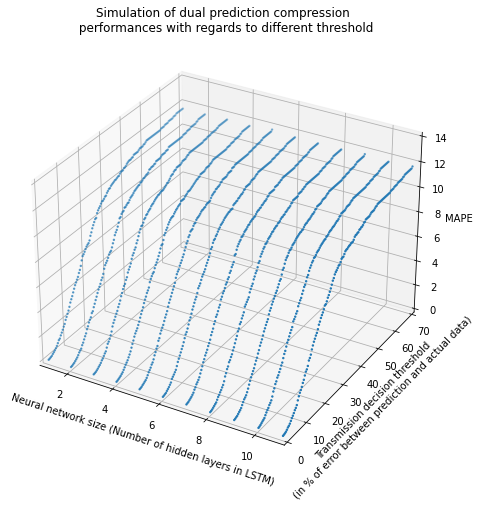

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax.plot(newdataset1, newdataset2, newdataset3) 
ax.set_title('Simulation of dual prediction compression \n performances with regards to different threshold') 
  
# label x-axis and y-axis 
ax.set_xlabel('Neural network size (Number of hidden layers in LSTM)') 
ax.set_ylabel('Transmission decision threshold \n(in % of error between prediction and actual data)') 
ax.set_zlabel('MAPE') 

# set x, y-axis limits  
ax.set_xlim(1, 11) 
ax.set_ylim(0, 70) 
ax.set_zlim(0, 14) 


ax.scatter(mape['Hunit'], mape['Threshold'], mape['MAPE'], s=2)


#plt.plot(newdataset2[1791:1990], newdataset3[1791:1990], c='green')

#plt.plot(newdataset2, newdataset3) 
plt.show()


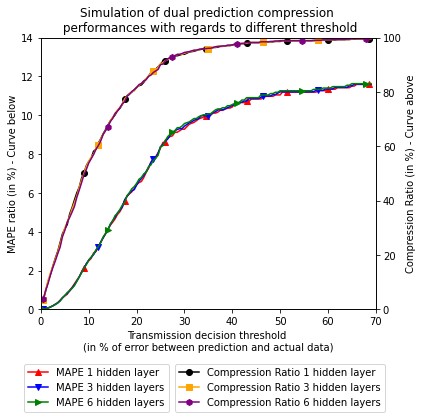

In [16]:
fig, ax = plt.subplots(figsize = (6,5))
#ax = fig.add_subplot(111, projection='3d')

ax.set_title('Simulation of dual prediction compression \n performances with regards to different threshold') 
  
# label x-axis and y-axis 
ax.set_xlabel('Transmission decision threshold \n(in % of error between prediction and actual data)') 
ax.set_ylabel('MAPE ratio (in %) - Curve below') 

# set x, y-axis limits  
ax.set_xlim(0, 70) 
ax.set_ylim(0, 14) 
for i,col,freq,marking in [(1,'red', 17, '^'),(3, 'blue', 23,'v'),(6, 'green', 27, '>')]:
    if i == 1 : 
        label = "MAPE 1 hidden layer"
    else:
        label = "MAPE " + (str) (i) + " hidden layers"  
    plt.plot(mape['Threshold'][i*139:(i*139)+138], mape['MAPE'][i*139:(i*139)+138] ,c=col, label = label, marker = marking, markevery = freq)

ax.legend(bbox_to_anchor=(-0.05, -0.2), loc=2, borderaxespad=0.)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(gapminder_us.year, gapminder_us["gdpPercap"],color="blue",marker="o")
for i,col,freq,marking in [(1,'black',17, 'o'),(3, 'orange',23, 's'),(6, 'purple',27, 'h')]:
    if i == 1 : 
        label = "Compression Ratio 1 hidden layer"
    else:
        label = "Compression Ratio "+ (str) (i) + " hidden layers"
    ax2.plot(mape['Threshold'][i*139:(i*139)+138], mape['Compression'][i*139:(i*139)+138], c=col, label = label, marker = marking, markevery = freq)

ax2.legend(bbox_to_anchor=(0.4, -0.2), loc=2, borderaxespad=0.)

ax2.set_ylabel("Compression Ratio (in %) - Curve above")
ax2.set_ylim(0, 100) 



#plt.plot(newdataset2[1791:1990], newdataset3[1791:1990], c='green')

plt.show()

In [48]:
mape.to_csv('curve_data_mobile.csv')

## MAPE Energy

In [ ]:
mape_dataframe = read_csv('Data_curves/results_dp_energy.csv', engine='python', dtype={'Hunit': np.float32, 'Seuil': np.float32, 'Index': np.int32, 'CalculatedData': np.float32, 'ActualData': np.float32, 'RetainedData' : np.float32, 'Transmitted': bool} )

In [ ]:
mape_dataframe

In [ ]:
mape = pd.DataFrame(columns=["Hunit", "Threshold", "MAPE", "Compression"])

In [ ]:
for i in range(0, 9*199):
    count = 0
    for j in range(0,1189):
        if mape_dataframe["ActualData"][i*1189+j] != mape_dataframe["RetainedData"][i*1189+j]:
            count +=1
    mape.loc[i] = [mape_dataframe['Hunit'][i*1189],mape_dataframe['Seuil'][i*1189],mean_absolute_percentage_error(mape_dataframe["ActualData"][i*718:i*718+717],mape_dataframe["RetainedData"][i*718:i*718+717])*100, count/718*100]
